<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Natural Language Processing
 
_Authors: Kiefer Katovich (San Francisco), Joseph Nelson (Washington, D.C.)_
 
---


### Learning Objectives
- Discuss the major tasks involved with natural language processing.
- Discuss, on a low level, the components of natural language processing.
- Identify why natural language processing is difficult.
- Demonstrate text classification.
- Demonstrate common text preprocessing techniques.

### How Do We Use NLP in Data Science?

In data science, we are often asked to analyze unstructured text or make a predictive model using it. Unfortunately, most data science techniques require numeric data. NLP libraries provide a tool set of methods to convert unstructured text into meaningful numeric data.

- **Analysis:** NLP techniques provide tools to allow us to understand and analyze large amounts of text. For example:

    - Analyze the positivity/negativity of comments on different websites. 
    - Extract key words from meeting notes and visualize how meeting topics change over time.

- **Vectorizing for machine learning:** When building a machine learning model, we typically must transform our data into numeric features. This process of transforming non-numeric data such as natural language into numeric features is called vectorization. For example:

    - Understanding related words. Using stemming, NLP lets us know that "swim", "swims", and "swimming" all refer to the same base word. This allows us to reduce the number of features used in our model.
    - Identifying important and unique words. Using TF-IDF (term frequency-inverse document frequency), we can identify which words are most likely to be meaningful in a document.

## Lesson Guide

- [Introduction to Natural Language Processing](#intro)
- [Reading Yelp reviews With NLP](#yelp_rev)
- [Text Classification](#text_class)
- [Count Vectorization](#count_vec)
    - [Using CountVectorizer in a Model](#countvectorizer-model)
    - [N-Grams](#ngrams)
    - [Stop-Word Removal](#stopwords)
	- [Count Vector Options](#cvec_opt)
- [Term Frequency–Inverse Document Frequency Vectorization](#tfidf)
	- [Yelp Summary Using TF–IDF](#yelp_tfidf)
- [Principal Component Analysis]
- [Latent Dirichlet Allocation]
- [BONUS: Adding Features to a Document-Term Matrix](#add_feat)
- [Conclusion](#conclusion)

<a id='intro'></a>

## Introduction

*Adapted from [NLP Crash Course](http://files.meetup.com/7616132/DC-NLP-2013-09%20Charlie%20Greenbacker.pdf) by Charlie Greenbacker and [Introduction to NLP](http://spark-public.s3.amazonaws.com/nlp/slides/intro.pdf) by Dan Jurafsky*

## Introduction

### What Is Natural Language Processing (NLP)?

- Using computers to process (analyze, understand, generate) natural human languages.
- Making sense of human knowledge stored as unstructured text.
- Building probabilistic models using data about a language.

### What Are Some of the Higher-Level Task Areas?

- **Objective:** Discuss the major tasks involved with natural language processing.

We often hope that computers can solve many high-level problems involving natural language. Unfortunately, due to the difficulty of understanding human language, many of these problems are still not well solved. That said, existing solutions to these problems all involve utilizing the lower-level components of NLP discussed in the next section. Some higher-level tasks include:

- **Chatbots:** Understand natural language from the user and return intelligent responses.
    - [Api.ai](https://api.ai/)
- **Information retrieval:** Find relevant results and similar results.
    - [Google](https://searchengineland.com/a-deep-dive-into-bert-how-bert-launched-a-rocket-into-natural-language-understanding-324522)    
- **Information extraction:** Structured information from unstructured documents.
    - [Events from Gmail](https://support.google.com/calendar/answer/6084018?hl=en)
- **Machine translation:** One language to another.
    - [Google Translate](https://translate.google.com/)
- **Text simplification:** Preserve the meaning of text, but simplify the grammar and vocabulary.
    - [Rewordify](https://rewordify.com/)
    - [Simple English Wikipedia](https://simple.wikipedia.org/wiki/Main_Page)
- **Predictive text input:** Faster or easier typing.
    - [Phrase completion application](https://justmarkham.shinyapps.io/textprediction/)
    - [A much better application](https://farsite.shinyapps.io/swiftkey-cap/)
- **Sentiment analysis:** Attitude of speaker.
    - [Hater News](https://medium.com/@KevinMcAlear/building-hater-news-62062c58325c)
- **Automatic summarization:** Extractive or abstractive summarization.
    - [autotldr](https://www.reddit.com/r/technology/comments/35brc8/21_million_people_still_use_aol_dialup/cr2zzj0)
- **Natural language generation:** Generate text from data.
    - [How a computer describes a sports match](http://www.bbc.com/news/technology-34204052)
    - [Publishers withdraw more than 120 gibberish papers](http://www.nature.com/news/publishers-withdraw-more-than-120-gibberish-papers-1.14763)
- **Speech recognition and generation:** Speech-to-text, text-to-speech.
    - [Google's Web Speech API demo](https://www.google.com/intl/en/chrome/demos/speech.html)
    - [Vocalware Text-to-Speech demo](https://www.vocalware.com/index/demo)
- **Question answering:** Determine the intent of the question, match query with knowledge base, evaluate hypotheses.
    - [How did supercomputer Watson beat Jeopardy champion Ken Jennings?](http://blog.ted.com/how-did-supercomputer-watson-beat-jeopardy-champion-ken-jennings-experts-discuss/)
    - [IBM's Watson Trivia Challenge](http://www.nytimes.com/interactive/2010/06/16/magazine/watson-trivia-game.html)
    - [The AI Behind Watson](http://www.aaai.org/Magazine/Watson/watson.php)

### What Are Some of the Lower-Level Components?

- **Objective:** Discuss, on a low level, the components of natural language processing.

Unfortunately, the NLP programming libraries typically do not provide direct solutions for the high-level tasks above. Instead, they provide low-level building blocks that enable us to craft our own solutions. These include:

- **Tokenization:** Breaking text into tokens (words, sentences, n-grams)
- **Stop-word removal:** a/an/the
- **Stemming and lemmatization:** root word
- **TF-IDF:** word importance
- **Part-of-speech tagging:** noun/verb/adjective
- **Named entity recognition:** person/organization/location
- **Spelling correction:** "New Yrok City"
- **Word sense disambiguation:** "buy a mouse"
- **Segmentation:** "New York City subway"
- **Language detection:** "translate this page"
- **Machine learning:** specialized models that work well with text

### Why is NLP hard?

- **Objective:** Identify why natural language processing is difficult.

Natural language processing requires an understanding of the language and the world. Several limitations of NLP are:

- **Ambiguity**:
    - Hospitals Are Sued by 7 Foot Doctors
    - Juvenile Court to Try Shooting Defendant
    - Local High School Dropouts Cut in Half
- **Non-standard English:** text messages
- **Idioms:** "throw in the towel"
- **Newly coined words:** "retweet"
- **Tricky entity names:** "Where is A Bug's Life playing?"
- **World knowledge:** "Mary and Sue are sisters", "Mary and Sue are mothers"

<a id='yelp_rev'></a>

## Reading in the Yelp Reviews

Throughout this lesson, we will use Yelp reviews to practice and discover common low-level NLP techniques.

You should be familiar with these terms, as they are frequently used in NLP:
- **corpus**: a collection of documents (derived from the Latin word for "body")
- **corpora**: plural form of corpus

In [1]:
from __future__ import unicode_literals # unicode handling
import pandas as pd
import numpy as np
import scipy as sp
import json
import spacy # pre-processing and traditional NLP stemming
import codecs # unicode handling
from scipy.sparse import hstack # stack arrays in sequence horizontally
from gensim.models.word2vec import Word2Vec # Gensim is used for LDA and word2vec
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # information retrieval
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA # principal component analysis
from sklearn import metrics

nlp_toolkit = spacy.load('en_core_web_sm')
%matplotlib inline

In [2]:
# Read yelp.csv into a DataFrame.
path = './yelp.csv'
yelp = pd.read_csv(path)

# Create a new DataFrame that only contains the 5-star and 1-star reviews.
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# Define X and y.
X = yelp_best_worst.text
y = yelp_best_worst.stars

# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [3]:
# The head of the original data
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [13]:
X_train.shape

(3064,)

In [4]:
# The head of the star review data
yelp_best_worst.head(30)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0
10,AsSCv0q_BWqIe3mX2JqsOQ,2010-06-16,E11jzpKz9Kw5K7fuARWfRw,5,The oldish man who owns the store is as sweet ...,review,-OMlS6yWkYjVldNhC31wYg,1,3,1
11,e9nN4XxjdHj4qtKCOPq_vg,2011-10-21,3rPt0LxF7rgmEUrznoH22w,5,Wonderful Vietnamese sandwich shoppe. Their ba...,review,C1rHp3dmepNea7XiouwB6Q,1,1,0
12,h53YuCiIDfEFSJCQpk8v1g,2010-01-11,cGnKNX3I9rthE0-TH24-qA,5,They have a limited time thing going on right ...,review,UPtysDF6cUDUxq2KY-6Dcg,1,2,0
17,O510Re68mOy9dU490JTKCg,2010-05-03,j4SIzrIy0WrmW4yr4--Khg,5,okay this is the best place EVER! i grew up sh...,review,u1KWcbPMvXFEEYkZZ0Yktg,0,0,0


<a id='text_class'></a>


# Introduction: Text Classification

As you proceed through this section, note that text classification is done in the same way as all other classification models. First, the text is vectorized into a set of numeric features. Then, a standard machine learning classifier is applied. NLP libraries often include vectorizers and ML models that work particularly well with text.

> We will refer to each piece of text we are trying to classify as a document.
> - For example, a document could refer to an email, book chapter, tweet, article, or text message.

**Text classification is the task of predicting which category or topic a text sample is from.**

We may want to identify:
- Is an article a sports or business story?
- Does an email have positive or negative sentiment?
- Is the rating of a recipe 1, 2, 3, 4, or 5 stars?

**Predictions are often made by using the words as features and the label as the target output.**

Starting out, we will make each unique word (across all documents) a single feature. In any given corpora, we may have hundreds of thousands of unique words, so we may have hundreds of thousands of features!

- For a given document, the numeric value of each feature could be the number of times the word appears in the document.
    - So, most features will have a value of zero, resulting in a sparse matrix of features.

- This technique for vectorizing text is referred to as a bag-of-words model. 
    - It is called bag of words because the document's structure is lost — as if the words are all jumbled up in a bag.
    - The first step to creating a bag-of-words model is to create a vocabulary of all possible words in the corpora.

> Alternatively, we could make each column an indicator column, which is 1 if the word is present in the document (no matter how many times) and 0 if not. This vectorization could be used to reduce the importance of repeated words. For example, a website search engine would be susceptible to spammers who load websites with repeated words. So, the search engine might use indicator columns as features rather than word counts.

**We need to consider several things to decide if bag-of-words is appropriate.**

- Does order of words matter?
- Does punctuation matter?
- Does upper or lower case matter?

## Demo: Text Processing in scikit-learn

- **Objective:** Demonstrate text classification.

<a id='count_vec'></a>


### Creating Features Using CountVectorizer

- **What:** Converts each document into a set of words and their counts.
- **Why:** To use a machine learning model, we must convert unstructured text into numeric features.
- **Notes:** Relatively easy with English language text, not as easy with some languages.

In [7]:
help(CountVectorizer)

Help on class CountVectorizer in module sklearn.feature_extraction.text:

class CountVectorizer(sklearn.base.BaseEstimator, VectorizerMixin)
 |  CountVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |  
 |  Convert a collection of text documents to a matrix of token counts
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  ----------

In [17]:
# Use CountVectorizer to create document-term matrices from X_train and X_test.
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [8]:
# Rows are documents, columns are terms (aka "tokens" or "features", individual words in this situation).
X_train_dtm.shape

(3064, 16825)

In [9]:
X_train.head(10)

6841    FILLY-B's!!!!!  only 8 reviews?? NINE now!!!\n...
1728    My husband and I absolutely LOVE this restaura...
3853    We went today after lunch. I got my usual of l...
671     Totally dissapointed.  I had purchased a coupo...
4920    Costco Travel - My husband and I recently retu...
2726    Not good. And it's not been for a couple of ye...
4484    Best muffler shop in town. There are VERY few ...
3607    I would just like to start off by saying that ...
5559    Saw this place on Triple D so I decided to giv...
1115    We decided to hit up the "Wine Down Wednesday"...
Name: text, dtype: object

In [19]:
y_train.head(30)

6841    5
1728    5
3853    5
671     1
4920    5
2726    1
4484    5
3607    5
5559    5
1115    1
4084    5
8480    5
22      5
7510    5
2589    5
4887    5
3665    5
9730    1
5539    5
4172    1
2287    5
9527    1
9951    5
2486    1
3306    5
4856    5
512     5
3739    5
4210    5
5817    5
Name: stars, dtype: int64

In [10]:
# Start at 50 features
print((vect.get_feature_names()[50:]))

['129', '12am', '12oz', '12pm', '12th', '13', '14', '140', '147', '14lbs', '15', '150', '1500', '150mm', '15am', '15mins', '15pm', '15th', '16', '160', '165', '169', '16th', '17', '17p', '18', '180', '18th', '19', '1900', '1913', '1928', '1929', '1930s', '1940', '1952', '1955', '1956', '1960', '1961', '1969', '1970', '1980', '1980s', '1987', '1990s', '1992', '1995', '1996', '1998', '1999', '19th', '1cent', '1k', '1p', '1pm', '1st', '20', '200', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '200lbs', '2010', '2011', '2012', '202', '20mbs', '20miles', '20min', '20pm', '20s', '20th', '20x', '21', '22', '220', '2240', '22oz', '23', '24', '24hrs', '24st', '24th', '25', '250', '25b', '25min', '25th', '26', '260', '2600', '2608', '2669', '26th', '27', '272', '28', '29', '29th', '2am', '2mbps', '2nd', '2pm', '2rd', '2wice', '2x', '30', '300', '3000', '30am', '30p', '30pm', '30th', '31', '311', '312', '32', '33', '33rd', '34', '34th', '35', '350ib', '35c', '35th', '36', '37', 

In [14]:
# Show vectorizer options.
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [21]:
help(vect)

Help on CountVectorizer in module sklearn.feature_extraction.text object:

class CountVectorizer(sklearn.base.BaseEstimator, VectorizerMixin)
 |  CountVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |  
 |  Convert a collection of text documents to a matrix of token counts
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  ---------

[CountVectorizer documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

One common method of reducing the number of features is converting all text to lowercase before generating features! Note that to a computer, `aPPle` is a different token/"word" than `apple`. So, by converting both to lowercase letters, it ensures fewer features will be generated. It might be useful not to convert them to lowercase if capitalization matters.

In [16]:
# Don't convert to lowercase.
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape
vect.get_feature_names()[50:]

['120',
 '128i',
 '129',
 '12am',
 '12oz',
 '12pm',
 '12th',
 '13',
 '14',
 '140',
 '147',
 '14lbs',
 '15',
 '150',
 '1500',
 '150mm',
 '15am',
 '15mins',
 '15pm',
 '15th',
 '16',
 '160',
 '165',
 '169',
 '16th',
 '17',
 '17p',
 '18',
 '180',
 '18th',
 '19',
 '1900',
 '1913',
 '1928',
 '1929',
 '1930s',
 '1940',
 '1952',
 '1955',
 '1956',
 '1960',
 '1961',
 '1969',
 '1970',
 '1980',
 '1980s',
 '1987',
 '1990s',
 '1992',
 '1995',
 '1996',
 '1998',
 '1999',
 '19th',
 '1PM',
 '1cent',
 '1k',
 '1p',
 '1st',
 '20',
 '200',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '200lbs',
 '2010',
 '2011',
 '2012',
 '202',
 '20mbs',
 '20miles',
 '20min',
 '20pm',
 '20s',
 '20th',
 '20x',
 '21',
 '22',
 '220',
 '2240',
 '22oz',
 '23',
 '24',
 '24hrs',
 '24st',
 '24th',
 '25',
 '250',
 '25B',
 '25min',
 '25th',
 '26',
 '260',
 '2600',
 '2608',
 '2669',
 '26th',
 '27',
 '272',
 '28',
 '29',
 '29th',
 '2Mbps',
 '2am',
 '2nd',
 '2pm',
 '2rd',
 '2wice',
 '2x',
 '30',
 '300',
 '300

<a id='countvectorizer-model'></a>


### Using CountVectorizer in a Random Forest Model
![DTM](images/DTM.png)

In [28]:
# Use default options for CountVectorizer.
vect = CountVectorizer()

# Create document-term matrices.
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Use Random Forest classifier to predict the star rating.
rf = RandomForestClassifier(n_estimators = 20)
rf.fit(X_train_dtm, y_train)

# Calculate test accuracy using area under the curve.
scores = cross_val_score(rf, X_test_dtm, y_test, cv = 5, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [0.78434685 0.87958494 0.85778636 0.8868749  0.81620093], Average AUC 0.8449587954078972


In [29]:
# Notice how the data was transformed into this sparse matrix with 1,022 datapoints and 16,825 features!
#   - Recall that vectorizations of text will be mostly zeros, since only a few unique words are in each document.
#   - For that reason, instead of storing all the zeros we only store non-zero values (inside the 'sparse matrix' data structure!).
#   - We have 3064 Yelp reviews in our training set.
#   - 16,825 unique words were found across all documents.

X_train_dtm

<3064x16825 sparse matrix of type '<class 'numpy.int64'>'
	with 237720 stored elements in Compressed Sparse Row format>

In [20]:
# Let's take a look at the vocabulary that was generated, containing 16,825 unique words.
#   'vocabulary_' is a dictionary that converts each word to its index in the sparse matrix.
#   - For example, the word "four" is index #3230 in the sparse matrix.

vect.vocabulary_

{'filly': 5773,
 'only': 10362,
 'reviews': 12465,
 'nine': 10069,
 'now': 10180,
 'wow': 16612,
 'do': 4631,
 'miss': 9578,
 'this': 15093,
 'place': 11186,
 '24hrs': 136,
 'drive': 4809,
 'thru': 15136,
 'or': 10413,
 'walk': 16195,
 'up': 15834,
 'ridiculously': 12514,
 'cheap': 2789,
 'tasty': 14838,
 'of': 10286,
 'course': 3679,
 'the': 15032,
 'arizona': 1018,
 'burritos': 2286,
 'are': 1003,
 'good': 6571,
 'everything': 5342,
 'is': 7956,
 'used': 15885,
 'to': 15228,
 'love': 8899,
 'one': 10354,
 'combos': 3233,
 'you': 16727,
 'get': 6433,
 'beef': 1564,
 'burrito': 2285,
 'taco': 14720,
 'rice': 12489,
 'and': 805,
 'beans': 1528,
 'for': 6028,
 'under': 15683,
 'color': 3213,
 'me': 9301,
 'silly': 13462,
 'call': 2398,
 'sally': 12808,
 'they': 15067,
 'have': 7023,
 'bomb': 1902,
 'horchata': 7345,
 'too': 15281,
 'really': 12038,
 'fresh': 6154,
 'flautas': 5882,
 'rolled': 12622,
 'tacos': 14721,
 'breakfast': 2069,
 'damn': 3999,
 'here': 7149,
 'whether': 16394,
 'd

In [87]:
# Finally, let's convert the sparse matrix to a typical ndarray using .toarray()
#   - Remember, this takes up a lot more memory than the sparse matrix! However, this conversion is sometimes necessary.

X_test_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Let's take a look next at other ways of preprocessing text!

- **Objective:** Demonstrate common text preprocessing techniques.

<a id='ngrams'></a>
### N-Grams

N-grams are features which consist of N consecutive words. This is useful because using the bag-of-words model, treating `data scientist` as a single feature has more meaning than having two independent features `data` and `scientist`!

Example:
```
my cat is awesome
Unigrams (1-grams): 'my', 'cat', 'is', 'awesome'
Bigrams (2-grams): 'my cat', 'cat is', 'is awesome'
Trigrams (3-grams): 'my cat is', 'cat is awesome'
4-grams: 'my cat is awesome'
```

- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [21]:
# Include 1-grams and 2-grams.
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3064, 169847)

We can start to see how supplementing our features with n-grams can lead to more feature columns. When we produce n-grams from a document with $W$ words, we add an additional $(n-W+1)$ features (at most). That said, be careful — when we compute n-grams from an entire corpus, the number of _unique_ n-grams could be vastly higher than the number of _unique_ unigrams! This could cause an undesired feature explosion.

Although we sometimes add important new features that have meaning such as `data scientist`, many of the new features will just be noise. So, particularly if we do not have much data, adding n-grams can actually decrease model performance. This is because if each n-gram is only present once or twice in the training set, we are effectively adding mostly noisy features to the mix.

In [22]:
# Start at 50 features
print((vect.get_feature_names()[50:]))

['000 thats', '000 they', '00a', '00a and', '00am', '00am 00pm', '00am before', '00am the', '00am then', '00am you', '00pm', '00pm and', '00pm information', '00pm my', '00pm oops', '00pm the', '01', '01 04', '01 16', '01 the', '02', '02 2010', '03', '03 pm', '03342', '03342 cents', '04', '04 2012', '05', '05 few', '05 minutes', '06', '06 hyundai', '07', '07 09', '07 after', '07 am', '07 ll', '07 think', '07 was', '07 we', '07 what', '09', '09 2008', '09 when', '0buxoc0crqjpvkezo3bqog', '0buxoc0crqjpvkezo3bqog select', '0l', '0l 8v', '10', '10 00', '10 000', '10 00am', '10 00pm', '10 07', '10 11', '10 12', '10 14', '10 15', '10 20', '10 25', '10 30', '10 30pm', '10 95', '10 99', '10 ac', '10 ahead', '10 also', '10 am', '10 and', '10 atmosphere', '10 beers', '10 bucks', '10 bummer', '10 burritos', '10 but', '10 cannot', '10 cent', '10 cents', '10 close', '10 days', '10 different', '10 differnt', '10 discount', '10 dishes', '10 drinks', '10 each', '10 employess', '10 even', '10 food', '10

<a id='stopwords'></a>

### Stop-Word Removal

- **What:** This process is used to remove common words that will likely appear in any text.
- **Why:** Because common words exist in most documents, they likely only add noise to your model and should be removed.

**What are stop words?**
Stop words are some of the most common words in a language. They are used so that a sentence makes sense grammatically, such as prepositions and determiners, e.g., "to," "the," "and." However, they are so commonly used that they are generally worthless for predicting the class of a document. Since "a" appears in spam and non-spam emails, for example, it would only contribute noise to our model.

Example: 

> 1. Original sentence: "The dog jumped over the fence"  
> 2. After stop-word removal: "dog jumped over fence"

The fact that there is a fence and a dog jumped over it can be derived with or without stop words.

In [33]:
# Show vectorizer options.
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

- **stop_words:** string {`english`}, list, or None (default)
- If `english`, a built-in stop word list for English is used.
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- If None, no stop words will be used. `max_df` can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms. (If `max_df` = 0.7, then if > 70% of documents contain a word it will not be included in the feature set!)

In [34]:
# Remove English stop words
vect = CountVectorizer(stop_words = 'english')
X_train_dtm = vect.fit_transform(X_train)

# Set of stop words
#print((vect.get_stop_words()))

In [35]:
X_train_dtm.shape

(3064, 16528)

In [36]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv='warn', n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score='raise-deprecating')
    Evaluate a score by cross-validation
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like
        The data to fit. Can be for example a list, or an array.
    
    y : array-like, optional, default: None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like, with shape (n_samples,), optional
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" `cv` instance
        (e.g., `GroupKFold`).
    
    scoring : string, callabl

### Build a random forest model to predict star ratings from yelp reviews

In [37]:
# Use CountVectorizer with parameters from the directions


# Create document-term matrices for X_train and X_test


# Use Random Forest classifier to predict the star rating from reviews.


# Calculate test accuracy using area under the curve.



In [ ]:
# Try to improve your accuracy by testing different parameters within 

# Best parameters: 
# 800 max_features CountVectorizer, 20 RF, 5 kfold --> 0.90
# 1000 max_features and n-gram (1,2) CountVectorizer, 100 RF, max_features log 2 --> 0.89

### Build a random forest model to predict website evergreeness from titles

In [39]:
# Loading in stumbleupon dataset once again
stumble = pd.read_csv("./stumbleupon.tsv", sep='\t')
stumble['title'] = stumble.boilerplate.map(lambda x: json.loads(x).get('title', ''))
stumble['body'] = stumble.boilerplate.map(lambda x: json.loads(x).get('body', ''))
stumble.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,title,body
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,24,0,5424,170,8,0.152941,0.079130,0,IBM Sees Holographic Calls Air Breathing Batte...,A sign stands outside the International Busine...
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,40,0,4973,187,9,0.181818,0.125448,1,The Fully Electronic Futuristic Starting Gun T...,And that can be carried on a plane without the...
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,55,0,2240,258,11,0.166667,0.057613,1,Fruits that Fight the Flu fruits that fight th...,Apples The most popular source of antioxidants...
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,24,0,2737,120,5,0.041667,0.100858,1,10 Foolproof Tips for Better Sleep,There was a period in my life when I had a lot...
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,14,0,12032,162,10,0.098765,0.082569,0,The 50 Coolest Jerseys You Didn t Know Existed...,Jersey sales is a curious business Whether you...


### Predicting "Greenness" Of Content

This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender.  

A description of the columns is below.

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
title|string|Title of the article
body|string|Body text of article
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonlinkratio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonlinkratio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonlinkratio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonlinkratio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

In [70]:
# Use CountVectorizer with parameters from the directions


# Create document-term matrices for X_train and X_test


# Use Random Forest classifier to predict the website evergreeness from titles.


# Calculate test accuracy using area under the curve.



In [ ]:
# Try to improve your accuracy by testing different parameters within 
model = RandomForestClassifier(n_estimators = 20)
    
# Use `fit` to learn the vocabulary of the titles
vectorizer.fit(titles)

# Use `tranform` to generate the sample X word matrix - one column per feature (word or n-grams)
X = vectorizer.transform(titles).toarray()
y = data['label']

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv = 3, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

In [ ]:
# Let me start you off
# Use CountVectorizer with parameters from the directions
X_text_features = 

# Create document-term matrices for X_train and X_test
# Use other quantitative features in the stumble dataset
other_features_columns = 
other_features = stumble[other_features_columns]

# Use Random Forest classifier to predict the website evergreeness from titles and quantitative features
X = hstack((X_text_features, other_features)).toarray()


# Calculate test accuracy using area under the curve.



In [ ]:
# Try to improve your accuracy by testing different parameters within 
# Use `tranform` to generate the sample X word matrix - one column per feature (word or n-grams)
X_text_features = vectorizer.transform(titles)

# Identify the features you want from the original dataset
other_features_columns = ['html_ratio', 'image_ratio']
other_features = data[other_features_columns]

# Stack them horizontally together
# This takes all of the word/n-gram columns and appends on two more columns for `html_ratio` and `image_ratio`
from scipy.sparse import hstack
X = hstack((X_text_features, other_features)).toarray()

scores = cross_val_score(model, X, y, cv=3, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

# What features of these are most important?
model.fit(X, y)

# all_feature_names = vectorizer.get_feature_names() + other_features_columns
# feature_importances = pd.DataFrame({'Features' : all_feature_names, 'Importance Score': model.feature_importances_})
# feature_importances.sort_values('Importance Score', ascending=False).head()

In [ ]:
# Try to improve your accuracy by testing different parameters within 
body_text = data['body'].fillna('')

# Use `fit` to learn the vocabulary
vectorizer.fit(body_text)

# Use `tranform` to generate the sample X word matrix - one column per feature (word or n-grams)
X = vectorizer.transform(body_text).toarray()

scores = cross_val_score(model, X, y, cv = 3, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

In [ ]:
# Try to improve your accuracy by testing different parameters within 

# Best parameters: 
# Use body text instead of website titles to predict evergreeness
# 800 max_features and n-gram (1,2) CountVectorizer, 100 RF, max_features log 2 --> 0.85

<a id='spacy'></a>
## Spacy

You should already have downloaded spacy, a Python library used to process and understand large volumes of text.

You can read more on the [Spacy website](https://spacy.io/usage/spacy-101).

### Let's try extracting some of the title content using spacy

In [17]:
help(nlp_toolkit)

Help on English in module spacy.lang.en object:

class English(spacy.language.Language)
 |  English(vocab=True, make_doc=True, max_length=1000000, meta={}, **kwargs)
 |  
 |  A text-processing pipeline. Usually you'll load this once per process,
 |  and pass the instance around your application.
 |  
 |  Defaults (class): Settings, data and factory methods for creating the `nlp`
 |      object and processing pipeline.
 |  lang (unicode): Two-letter language ID, i.e. ISO code.
 |  
 |  DOCS: https://spacy.io/api/language
 |  
 |  Method resolution order:
 |      English
 |      spacy.language.Language
 |      builtins.object
 |  
 |  Data and other attributes defined here:
 |  
 |  Defaults = <class 'spacy.lang.en.EnglishDefaults'>
 |  
 |  
 |  lang = 'en'
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from spacy.language.Language:
 |  
 |  __call__(self, text, disable=[], component_cfg=None)
 |      Apply the pipeline to some text

In [40]:
title = stumble['title'][0]
print(title)

IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries


In [41]:
parsed = nlp_toolkit(title)

for(c, word) in enumerate(parsed):
    print("Word: {}".format(word))
    print("\t Phrase type: {}".format(word.dep_))
    print("\t Is the word known entity type? {}".format(word.ent_type_ if word.ent_type_ else "No"))
    print("\t Lemma: {}".format(word.lemma_))
    print("\t Parent of this word: {}".format(word.head.lemma_))

Word: IBM
	 Phrase type: nsubj
	 Is the word known entity type? ORG
	 Lemma: IBM
	 Parent of this word: see
Word: Sees
	 Phrase type: ROOT
	 Is the word known entity type? No
	 Lemma: see
	 Parent of this word: see
Word: Holographic
	 Phrase type: compound
	 Is the word known entity type? No
	 Lemma: Holographic
	 Parent of this word: Calls
Word: Calls
	 Phrase type: dobj
	 Is the word known entity type? No
	 Lemma: Calls
	 Parent of this word: see
Word: Air
	 Phrase type: compound
	 Is the word known entity type? No
	 Lemma: Air
	 Parent of this word: Batteries
Word: Breathing
	 Phrase type: compound
	 Is the word known entity type? No
	 Lemma: Breathing
	 Parent of this word: Batteries
Word: Batteries
	 Phrase type: appos
	 Is the word known entity type? No
	 Lemma: Batteries
	 Parent of this word: Calls
Word: ibm
	 Phrase type: aux
	 Is the word known entity type? No
	 Lemma: ibm
	 Parent of this word: see
Word: sees
	 Phrase type: ROOT
	 Is the word known entity type? No
	 Lemma: s

In [44]:
help(nlp_toolkit)

Help on English in module spacy.lang.en object:

class English(spacy.language.Language)
 |  English(vocab=True, make_doc=True, max_length=1000000, meta={}, **kwargs)
 |  
 |  A text-processing pipeline. Usually you'll load this once per process,
 |  and pass the instance around your application.
 |  
 |  Defaults (class): Settings, data and factory methods for creating the `nlp`
 |      object and processing pipeline.
 |  lang (unicode): Two-letter language ID, i.e. ISO code.
 |  
 |  DOCS: https://spacy.io/api/language
 |  
 |  Method resolution order:
 |      English
 |      spacy.language.Language
 |      builtins.object
 |  
 |  Data and other attributes defined here:
 |  
 |  Defaults = <class 'spacy.lang.en.EnglishDefaults'>
 |  
 |  
 |  lang = 'en'
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from spacy.language.Language:
 |  
 |  __call__(self, text, disable=[], component_cfg=None)
 |      Apply the pipeline to some text

In [42]:
# All entity types of spacy --> https://spacy.io/api/annotation#named-entities

# We can also create a function that finds all titles that reference an organization
def ref_org(title):
    parsed = nlp_toolkit(title)
    return any([word.ent_type_ == 'ORG' for word in parsed])

stumble['title'][:10].fillna('').map(ref_org)

0     True
1     True
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9    False
Name: title, dtype: bool

In [45]:
# Check function
stumble['title'][:10]

0    IBM Sees Holographic Calls Air Breathing Batte...
1    The Fully Electronic Futuristic Starting Gun T...
2    Fruits that Fight the Flu fruits that fight th...
3                  10 Foolproof Tips for Better Sleep 
4    The 50 Coolest Jerseys You Didn t Know Existed...
5                            Genital Herpes Treatment 
6                    fashion lane American Wild Child 
7    Racing For Recovery by Dean Johnson racing for...
8                   Valet The Handbook 31 Days 31 days
9          Cookies and Cream Brownies How Sweet It Is 
Name: title, dtype: object

In [49]:
# Write a function that finds all titles that reference and organization AND person
def ref_org_1(title):
    parsed = nlp_toolkit(title)
    return any([word.ent_type_ == 'ORG' and word.ent_type_ == 'PERSON' for word in parsed])

stumble['title'][:10].fillna('').map(ref_org)

0     True
1     True
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9    False
Name: title, dtype: bool

In [50]:
# Write a function that finds all titles that reference and organization OR a person
def ref_org_2(title):
    parsed = nlp_toolkit(title)
    return any([word.ent_type_ == 'ORG' or word.ent_type_ == 'PERSON' for word in parsed])

stumble['title'][:10].fillna('').map(ref_org)

0     True
1     True
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9    False
Name: title, dtype: bool

In [ ]:
# Check function


<a id='tfidf'></a>
## Term Frequency–Inverse Document Frequency (TF–IDF)

While a Count Vectorizer simply totals up the number of times a "word" appears in a document, the more complex TF-IDF Vectorizer analyzes the uniqueness of words between documents to find distinguishing characteristics. 
     
- **What:** Term frequency–inverse document frequency (TF–IDF) computes the "relative frequency" with which a word appears in a document, compared to its frequency across all documents.
- **Why:** It's more useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents).
- **Notes:** It's used for search-engine scoring, text summarization, and document clustering.

In [51]:
# Example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [54]:
# Term frequency
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [57]:
# Document frequency
vect = CountVectorizer(binary=True)
df = vect.fit_transform(simple_train).toarray().sum(axis=0)
pd.DataFrame(df.reshape(1, 6), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,1,3,2,1,1,1


In [77]:
# Term frequency–inverse document frequency (simple version)
tf/df

,cab,call,me,please,tonight,you
0,0.0,0.333333,0.0,0.0,1.0,1.0
1,1.0,0.333333,0.5,0.0,0.0,0.0
2,0.0,0.333333,0.5,2.0,0.0,0.0


The higher the TF–IDF value, the more "important" the word is to that specific document. Here, "cab" is the most important and unique word in document 1, while "please" is the most important and unique word in document 2. TF–IDF is often used for training as a replacement for word count.

In [58]:
# TfidfVectorizer
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


In [59]:
help(TfidfVectorizer)

Help on class TfidfVectorizer in module sklearn.feature_extraction.text:

class TfidfVectorizer(CountVectorizer)
 |  TfidfVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.float64'>, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)
 |  
 |  Convert a collection of raw documents to a matrix of TF-IDF features.
 |  
 |  Equivalent to :class:`CountVectorizer` followed by
 |  :class:`TfidfTransformer`.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  ----------
 |  input : string {'filename', 'file', 'content'}
 |      If 'filename', the sequence passed as an argument to fit is
 |      expected to be a list of filenames that need reading to fetch
 |      the raw con

**More details:** [TF–IDF is about what matters](http://planspace.org/20150524-tfidf_is_about_what_matters/)

<a id='add_feat'></a>
## Bonus: Adding Features to a Document-Term Matrix

Here, we will add additional features to our `CountVectorizer()`-generated feature set to hopefully improve our model.

To make the best models, you will want to supplement the auto-generated features with new features you think might be important. After all, `CountVectorizer()` typically lowercases text and removes all associations between words. Or, you may have metadata to add in addition to just the text.

> Remember: Although you may have hundreds of thousands of features, each data point is extremely sparse. So, if you add in a new feature, e.g., one that detects if the text is all capital letters, this new feature can still have a huge effect on the model outcome!

In [61]:
# Create a DataFrame that only contains the 5-star and 1-star reviews.
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y
feature_cols = ['text', 'cool', 'useful', 'funny']
X = yelp_best_worst[feature_cols]
y = yelp_best_worst.stars

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [62]:
# Use CountVectorizer with text column only.
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.text)
X_test_dtm = vect.transform(X_test.text)
print((X_train_dtm.shape))
print((X_test_dtm.shape))

(3064, 16825)
(1022, 16825)


In [63]:
# Shape of other four feature columns
X_train.drop('text', axis=1).shape

(3064, 3)

In [64]:
# Cast other feature columns to float and convert to a sparse matrix.
extra = sp.sparse.csr_matrix(X_train.drop('text', axis=1).astype(float))
extra.shape

(3064, 3)

In [65]:
# Combine sparse matrices.
X_train_dtm_extra = sp.sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

(3064, 16828)

In [66]:
# Repeat for testing set.
extra = sp.sparse.csr_matrix(X_test.drop('text', axis=1).astype(float))
X_test_dtm_extra = sp.sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(1022, 16828)

In [69]:
# Use logistic regression with text column only.
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9178082191780822


/Users/tiffanykelly/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
# Use logistic regression with all features.
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9187866927592955


In [ ]:
# Use TFidfVectorizer instead of CountVectorizer with your own paramaters
vectorizer = TfidfVectorizer(max_features = 1004, ngram_range=(1, 2), stop_words='english')
X_text_features = 

# Create document-term matrices for X_train and X_test
other_features_columns = 
other_features = stumble[other_features_columns]

# Use Random Forest classifier to predict the website evergreeness from titles and quantitative features
X = hstack((X_text_features, other_features)).toarray()


# Calculate test accuracy using area under the curve.


# Did our accuracy improve?



<a id='conclusion'></a>
## Conclusion

- NLP is a gigantic field.
- Understanding the basics broadens the types of data you can work with.
- Simple techniques go a long way.
- Use scikit-learn for NLP whenever possible.

# Dimensionality Reduction

### Principal Component Analysis (PCA)

In [13]:
# Load in the iris data set
data = './iris.data'
iris = pd.read_csv(data)

In [14]:
iris
#type(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
# Let's separate our features and response variable
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]
y = iris.species

The PCA algorithm takes an argument `n_components` which specifyies how many of the principal components we want to keep.  This dataset has only 4 features, so let's try keeping 2 to start: 

In [16]:
# Instantiate the model and fit the data
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [17]:
# Percentage of variance explained (first two components):
print ("First component: " + str(pca.explained_variance_ratio_[0]))
print ("Second component: " + str(pca.explained_variance_ratio_[1]))

First component: 0.9246162071742684
Second component: 0.053015567850535


We can see that the first principal component explains most of the variance.  Since we kept only 2 components we can use a simple 2-dimensional plot to view the datapoints in the new coordinate system.  We'll label them using our known target info:

In [21]:
help(pca)

Help on PCA in module sklearn.decomposition.pca object:

class PCA(sklearn.decomposition.base._BasePCA)
 |  PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA)
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Para

In [19]:
X_r

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

We can use a scree plot to help validate our choice of `n`.  Let's refit the model, but this time keep all components - this is the default behavior if `n_components` is not specified:

In [20]:
# Instantiate the model and fit the data - no n_components set:
pca = PCA()
X_r = pca.fit(X).transform(X)

As before, the explained variance ratios are in `pca.explained_variance_ratio_`, but this time there should be 4 ...

In [22]:
ratios = pca.explained_variance_ratio_
ratios

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

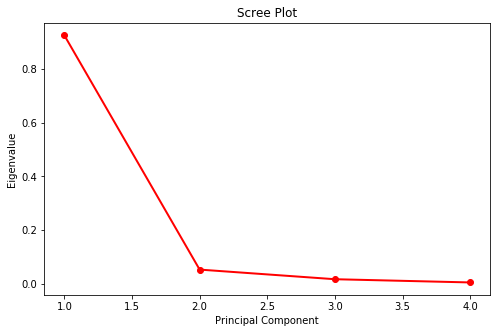

In [25]:
import matplotlib.pyplot as plt
comp_id = [1, 2, 3, 4]             # id number of component
fig = plt.figure(figsize=(8,5))
plt.plot(comp_id, ratios, 'ro-', linewidth=2);
plt.title('Scree Plot');
plt.xlabel('Principal Component');
plt.ylabel('Eigenvalue');

There is a clear 'elbow in the curve', so it looks like our choice of `2` components was ok.  Let's look at another dataset that has more features per record. 

In [26]:
# Load in the sklearn digits data set
# It contains a set of 8x8 pixel images
from sklearn.datasets import load_digits
digits = load_digits()

In [28]:
# Take a look at the data set
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Notice that each row in the dataset has 64 features, one for each of the individual pixels making up the image, where the value of each feature is the greyscale level (0 to 15).

In [29]:
X, y = digits.data, digits.target

print("data shape: %r, target shape: %r" % (X.shape, y.shape))
print("classes: %r" % list(np.unique(y)))

data shape: (1797, 64), target shape: (1797,)
classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [30]:
n_samples, n_features = X.shape
print("n_samples=%d" % n_samples)
print("n_features=%d" % n_features)

n_samples=1797
n_features=64


In [35]:
# Helper function for plotting images

def plot_gallery(data, labels, shape, interpolation='nearest'):
    for i in range(data.shape[0]):
        plt.subplot(1, data.shape[0], (i + 1))
        plt.imshow(data[i].reshape(shape), interpolation=interpolation, cmap=pl.cm.binary)
        plt.title(labels[i])
        plt.xticks(()), plt.yticks(())

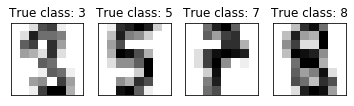

In [36]:
subsample = np.random.permutation(X.shape[0])[:4]      # pick 4 random records 
images = X[subsample]
labels = ['True class: %d' % l for l in y[subsample]]  # label with the true (known) value
plot_gallery(images, labels, shape=(8, 8))             # plot them in grayscale

In [37]:
# Run normal PCA
X, y = digits.data, digits.target

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

ratios = pca.explained_variance_ratio_
ratios

array([0.14890594, 0.13618771])

Was 2 a good choice - i.e. can we capture enough of the variance with just 2 components?  Let's see what the rest would have looked like:

In [39]:
# Instantiate the model and fit the data - no n_components set:
X, y = digits.data, digits.target

pca = PCA()
X_r = pca.fit(X).transform(X)

ratios = pca.explained_variance_ratio_
ratios

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

As before, a scree plot can help us pick a good n.

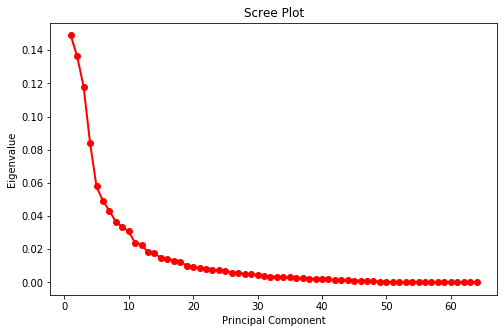

In [41]:
comp_id = [i + 1 for i in range(64)]             # ids of components
fig = plt.figure(figsize=(8,5))
plt.plot(comp_id, ratios, 'ro-', linewidth=2);
plt.title('Scree Plot');
plt.xlabel('Principal Component');
plt.ylabel('Eigenvalue');

Based on this plot we would probably want to set `n_components` to somewhere around 10 - 12 for a good tradeoff between model complexity and coverage of the variance. 

### Other dimensionality reduction techniques
https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/